In [1]:
import datetime as dt
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
#ticker and date 
start= dt.datetime(2015,1,1)
end = dt.datetime(2025,1,1)

tickers= ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
"""
| ------ | --------------- |
| BAC    | Bank of America |
| C      | Citigroup       |
| GS     | Goldman Sachs   |
| JPM    | JPMorgan Chase  |
| MS     | Morgan Stanley  |
| WFC    | Wells Fargo     |
"""

'\n| ------ | --------------- |\n| BAC    | Bank of America |\n| C      | Citigroup       |\n| GS     | Goldman Sachs   |\n| JPM    | JPMorgan Chase  |\n| MS     | Morgan Stanley  |\n| WFC    | Wells Fargo     |\n'

In [18]:
#web scraping using yfinance and getting closing datas
cl_price = pd.DataFrame() #empty df

for ticker in tickers:
    df = yf.download(ticker, start = start, end = end, auto_adjust= True)
    if not df.empty:
        cl_price[ticker] = df['Close']

#delete nan values 
cl_price.dropna(axis = 0, how='any',inplace = True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
#daily prices 
daily_returns = cl_price.pct_change().dropna() 

In [20]:

print("Kapanış fiyatları:")
print(cl_price.describe())
print("\nGünlük getiriler:")
print(daily_returns.describe())

Kapanış fiyatları:
               BAC            C           GS          JPM           MS  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     25.636794    48.440417   245.685082   104.201751    53.871175   
std       8.906669     9.390337   101.076158    44.711653    26.410663   
min       9.010223    26.317577   115.225693    40.657444    16.537096   
25%      19.606886    40.890008   170.673836    72.315062    33.456089   
50%      25.303401    48.013573   201.081947    93.531734    41.673426   
75%      32.007470    56.299333   314.927872   133.396580    78.518700   
max      46.671661    70.963509   596.400696   245.101456   132.112518   

               WFC  
count  2516.000000  
mean     41.494097  
std       8.439506  
min      18.853182  
25%      38.414867  
50%      41.491632  
75%      44.441840  
max      76.102943  

Günlük getiriler:
               BAC            C           GS          JPM           MS  \
count  2515.000000  2515.000000 

In [22]:
rolling_mean = daily_returns.rolling(window = 30).mean()#last 30 days mean

rolling_std= daily_returns.rolling(window = 30).std()#voltalite of  last30 days 

In [24]:
#cumulative shows how an investment grows over time

cumulative_returns = (1+daily_returns).cumprod()

<Figure size 1200x500 with 0 Axes>

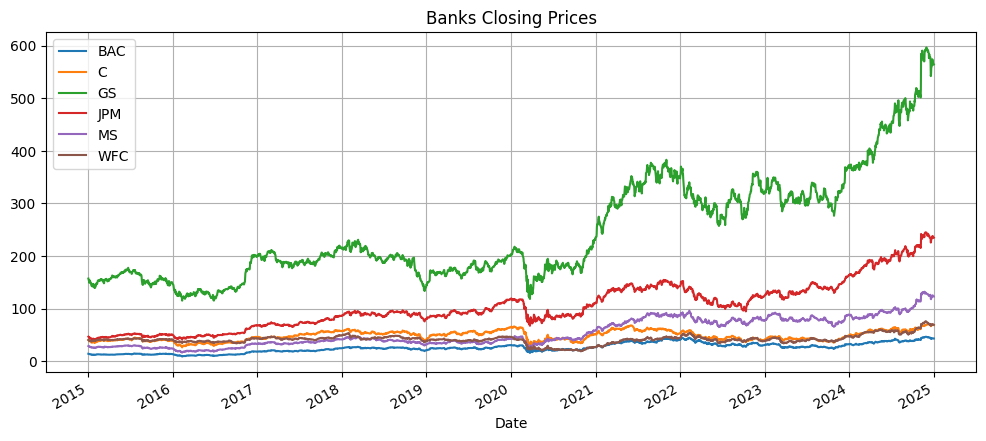

In [38]:
plt.figure(figsize=(12,5))
cl_price.plot(title='Banks Closing Prices', figsize=(12,5))
plt.grid(True)
plt.show()

<Figure size 1200x500 with 0 Axes>

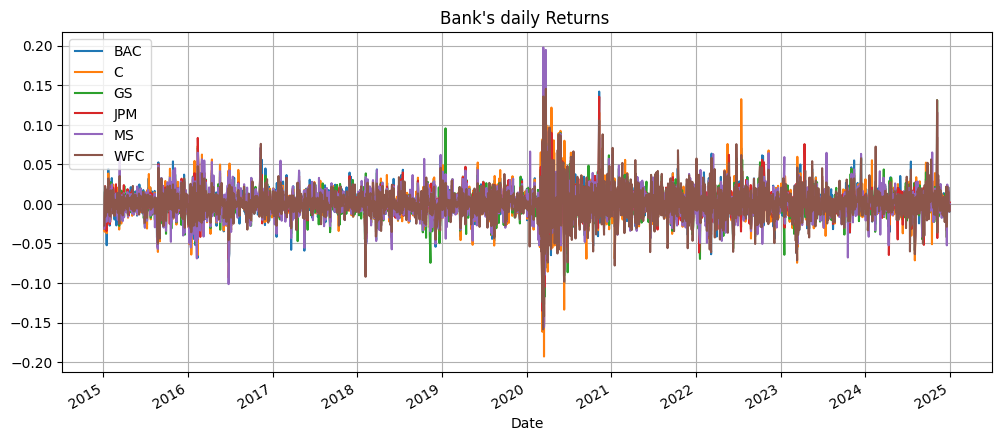

In [47]:
plt.figure(figsize=(12,5))
daily_returns.plot(title="Bank's daily Returns ", figsize=(12,5))
plt.grid(True)
plt.show()

<Figure size 1200x500 with 0 Axes>

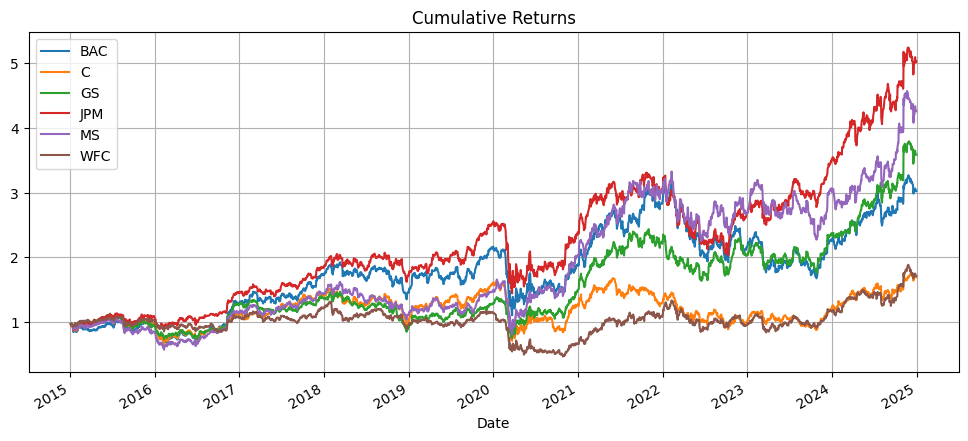

In [29]:

plt.figure(figsize = (12,5))
cumulative_returns.plot(title='Cumulative Returns',figsize=(12,5))
plt.grid(True)
plt.show()

<Figure size 1200x500 with 0 Axes>

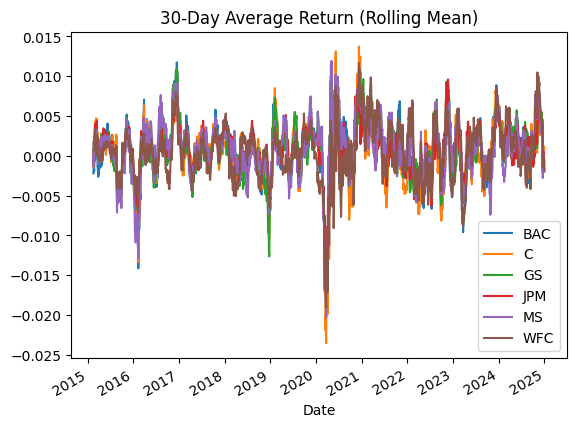

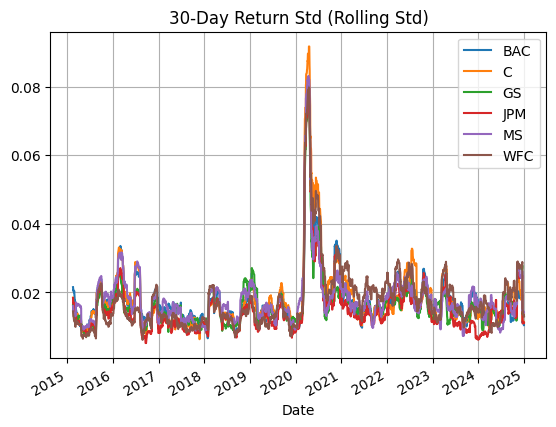

In [30]:
plt.figure(figsize=(12,5))
rolling_mean.plot(title='30-Day Average Return (Rolling Mean)')
rolling_std.plot(title='30-Day Return Std (Rolling Std)')
plt.grid(True)
plt.show()



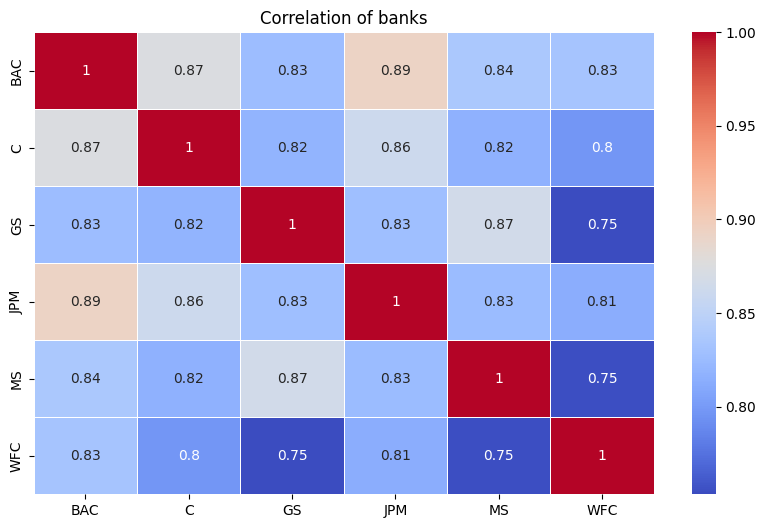

In [48]:
# ----------------------------
plt.figure(figsize=(10,6))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of banks')
plt.show()


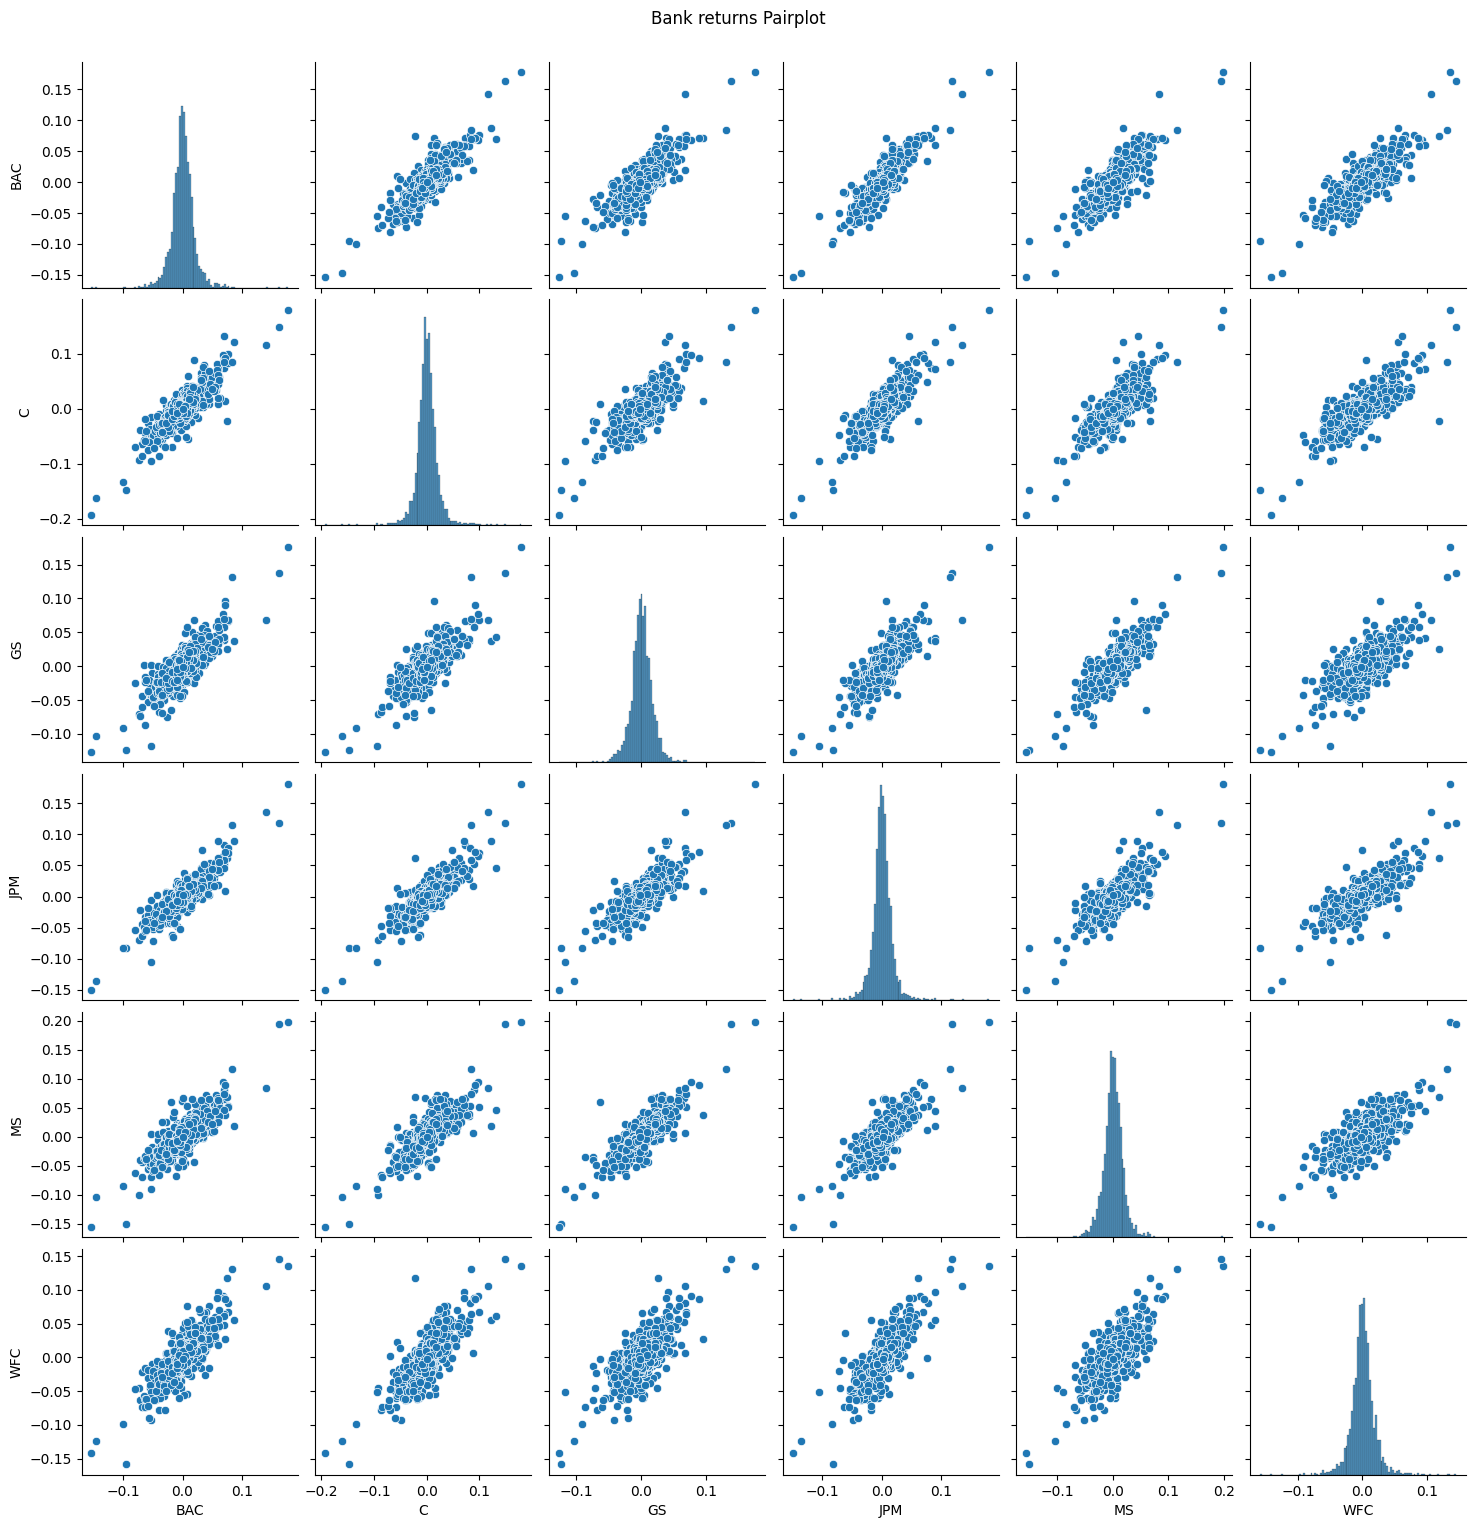

In [49]:
# 🔹 Pairplot
# ----------------------------
sns.pairplot(daily_returns)
plt.suptitle("Bank returns Pairplot", y=1.02)
plt.show()